<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#When-do-most-wildfires-occur?" data-toc-modified-id="When-do-most-wildfires-occur?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>When do most wildfires occur?</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Findings</a></span></li></ul></li><li><span><a href="#Where-do-wildfires-occur?" data-toc-modified-id="Where-do-wildfires-occur?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Where do wildfires occur?</a></span></li><li><span><a href="#How-many-acres-burn-over-time?" data-toc-modified-id="How-many-acres-burn-over-time?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>How many acres burn over time?</a></span></li><li><span><a href="#How-long-do-wildfires-burn-for?" data-toc-modified-id="How-long-do-wildfires-burn-for?-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>How long do wildfires burn for?</a></span></li><li><span><a href="#Target-Variable:-Acres-burned" data-toc-modified-id="Target-Variable:-Acres-burned-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Target Variable: Acres burned</a></span></li></ul></li></ul></div>

# Exploratory Data Analysis

## Introduction

In [84]:
# data analysis & manipulation
import pandas as pd
import numpy as np

# tools
import pickle

# visualizations
import matplotlib.pyplot as plt
%matplotlib inline
from keplergl import KeplerGl

# notebook options
pd.set_option('display.precision', 2)

In [16]:
# load pickle
df = pd.read_pickle('../data/01_fire_weather.pkl')
df.head()

,Name,Latitude,Longitude,AcresBurned,Counties,AdminUnit,Updated,Started,Extinguished,CalFireIncident,...,geometry,RequestURL,sunsetTime,moonPhase,precipIntensity,temperatureHigh,temperatureLow,dewPoint,humidity,windSpeed
52378c,Pilot Fire,40.618056,-123.675556,30,[Humboldt],CAL FIRE Humbolt-Del Norte Unit,2019-01-15 10:38:00+00:00,2019-01-01 14:14:00+00:00,2019-01-15 10:38:00+00:00,True,...,POINT (-123.67556 40.61806),https://api.darksky.net/forecast/4f4ef1267ba70...,1546390740,0.88,0.0006,52.46,32.19,13.31,0.37,5.86
398fe2,Scott Fire,39.246780,-121.323990,80,[Yuba],CAL FIRE Nevada-Yuba-Placer Unit,2019-06-27 08:24:51.860000+00:00,2019-06-25 13:51:09+00:00,2019-06-25 13:50:00+00:00,True,...,POINT (-121.32399 39.24678),https://api.darksky.net/forecast/4f4ef1267ba70...,1561520220,0.77,0.0004,91.96,60.33,50.88,0.42,4.96
030e7d,York Fire,35.817780,-120.097150,161,[Kings],Fresno-Kings County,2019-06-24 11:45:00+00:00,2019-04-28 22:20:00+00:00,2019-06-24 11:45:00+00:00,True,...,POINT (-120.09715 35.81778),https://api.darksky.net/forecast/4f4ef1267ba70...,1556505960,0.82,0.0009,83.37,56.30,48.51,0.55,7.75
b5b503,Cana Fire,39.839580,-121.957000,10,[Butte],CAL FIRE / Butte County Fire,2019-05-08 08:47:00+00:00,2019-04-30 12:20:00+00:00,2019-05-08 08:47:00+00:00,True,...,POINT (-121.95700 39.83958),https://api.darksky.net/forecast/4f4ef1267ba70...,1556679720,0.88,0.0016,72.21,47.45,45.50,0.60,6.20
abd7ac,Woody Fire,35.651890,-118.925450,115,[Kern],Kern County Fire Department,2019-05-08 08:47:00+00:00,2019-04-30 18:37:00+00:00,2019-05-08 08:47:00+00:00,False,...,POINT (-118.92545 35.65189),https://api.darksky.net/forecast/4f4ef1267ba70...,1556678520,0.88,0.0007,70.64,51.38,46.74,0.63,6.10


## When do most wildfires occur?

In [59]:
# wildfires by year – count & percent of total
pd.DataFrame([df['Started'].dt.year.value_counts().sort_index(), 
              round(df['Started'].dt.year.value_counts(normalize=True).sort_index(), 2)
             ],
             index=['Count', 'Percent of Total']).transpose()

,Count,Percent of Total
2013,138.0,0.10
2014,69.0,0.05
2015,93.0,0.07
2016,147.0,0.11
2017,409.0,0.31
2018,297.0,0.22
2019,187.0,0.14


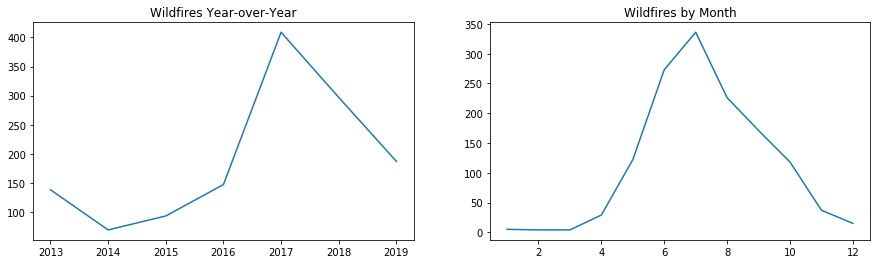

In [154]:
plt.figure(figsize = [15, 4])

# wildfires year-over-year
plt.subplot(1,2,1)
plt.title('Wildfires Year-over-Year')
plt.plot(df['Started'].dt.year.value_counts().sort_index())

# wildfires by month
plt.subplot(1,2,2)
plt.title('Wildfires by Month')
plt.plot(df['Started'].dt.month.value_counts().sort_index())

### Findings
* 67% of wildfires from this dataset are from 2017-2019
    * It appears that most wildfires aren't tracked as various sources indicate that there are thousands of wildfires every year. [[source]](https://www.zurichna.com/about/news/news-releases/2020/lessons-from-california-fires-investing-in-resilience-is-key)

## Acres burned over time?

In [43]:
fire_year = df['Started'].dt.year
df.groupby(fire_year).agg(['sum', 'mean', 'median'])['AcresBurned']

,sum,mean,median
Started,,,
2013,496877,3600.56,124.5
2014,261348,3787.65,274.0
2015,412606,4436.62,116.0
2016,319592,2174.10,120.0
2017,1205647,2947.79,78.0
2018,1569187,5283.46,77.0
2019,192448,1029.13,80.0


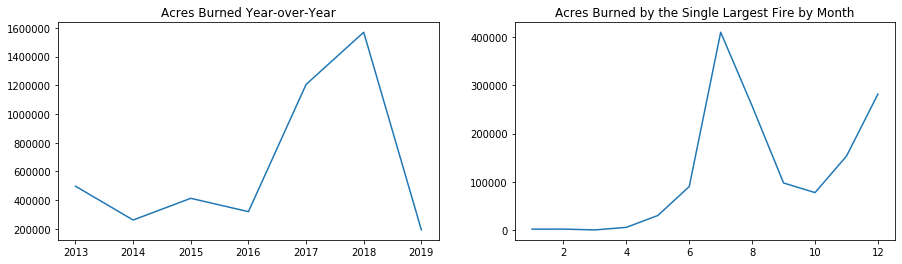

In [152]:
plt.figure(figsize = [15, 4])

# acres burned year-over-year
plt.subplot(1,2,1)
plt.title('Acres Burned Year-over-Year')
plt.plot(df.groupby(fire_year).agg(['sum'])['AcresBurned'])

# acres burned by the largest fire each month
plt.subplot(1,2,2)
plt.title('Acres Burned by the Single Largest Fire by Month')
fire_month = df['Started'].dt.month
plt.plot(df.groupby(fire_month).agg(['max'])['AcresBurned'])

## Top Ten Largest Fires

In [95]:
df.loc[:, ['AcresBurned', 'Name', 'Started']].nlargest(10, columns='AcresBurned')

,AcresBurned,Name,Started
faf950,410203,Ranch Fire (Mendocino Complex),2018-07-27 12:05:00+00:00
d40bee,281893,Thomas Fire,2017-12-04 18:28:00+00:00
939e78,257314,Rim Fire,2013-08-17 15:25:00+00:00
7a6c9d,229651,Carr Fire,2018-07-23 13:15:00+00:00
5f6014,153336,Camp Fire,2018-11-08 06:33:00+00:00
831f7d,151623,Rough Fire,2015-07-31 19:00:00+00:00
d61261,97717,King Fire,2014-09-13 16:32:00+00:00
ac65c6,96949,Woolsey Fire,2018-11-08 14:24:00+00:00
df44ed,96901,Ferguson Fire,2018-07-13 21:36:00+00:00
a0e84a,90288,County Fire,2018-06-30 14:12:00+00:00


### Findings
* Although 2017 had the most wildfires logged, 2018 was more arguably more destructive as there were more acres burned.
* Some of the largest fires have been late in the year such as the Thomas Fire (Dec-2017) and the Camp Fire (Nov-2018).

## Where do wildfires occur?
* Counties
* Lat/long

In [80]:
# Load an empty map
map_fires = KeplerGl(height=700)
map_fires.add_data(data=df.loc[:, ['Name', 'Latitude', 'Longitude', 'AcresBurned']], name='wildfires')
map_fires

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'wildfires': {'index': ['52378c', '398fe2', '030e7d', 'b5b503', 'abd7ac', '817c13', 'fcc925', '…

In [85]:
# pickle map config file
with open('../data/02_map_fires_config.pkl', 'wb') as f:
    pickle.dump(map_fires.config, f)

### Findings
* There are four main clusters of fires
    * Greater Los Angeles
    * SF East Bay
    * Butte County
    * West of Fresno


## How long do wildfires burn for?

In [122]:
# median wildfire duration
duration = (df['Extinguished'] - df['Started'])
duration.median()

Timedelta('80 days 23:12:00')

(array([ 25., 292.,  67.,  85.,  23.,  40.,  28.,   8.,  10.,   9.]),
 array([-2. , -0.4,  1.2,  2.8,  4.4,  6. ,  7.6,  9.2, 10.8, 12.4, 14. ]),
 <a list of 10 Patch objects>)

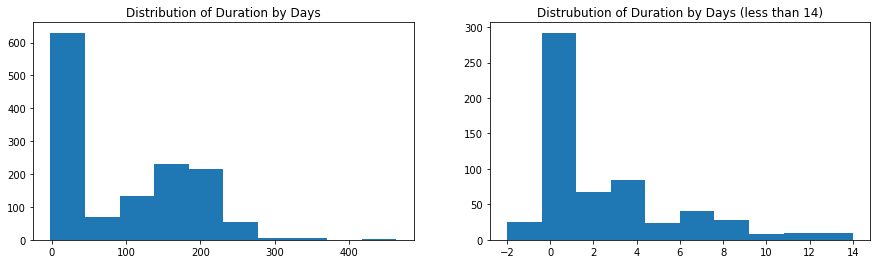

In [150]:
# define duration by days
duration_days = duration.astype('timedelta64[D]')

plt.figure(figsize = [15, 4])

# distribution of duration
plt.subplot(1, 2, 1)
plt.title('Distribution of Duration by Days')
plt.hist(duration_days)

plt.subplot(1, 2, 2)
plt.title('Distrubution of Duration by Days (less than 14)')
plt.hist(duration_days.where(duration_days <= 14))

### Findings
* Well, it looks like we can't rely on the duration of wildfires as sources indicates most fires are extinguished within a week, but our data has the mean as 80 days! [[2019]](https://en.wikipedia.org/wiki/2019_California_wildfires) [[2018]](https://en.wikipedia.org/wiki/2018_California_wildfires)

## How was the weather?

In [173]:
df.iloc[:, -6:].agg(['mean', 'median', 'max', 'min'])

,precipIntensity,temperatureHigh,temperatureLow,dewPoint,humidity,windSpeed
mean,3.60e-04,86.90,58.47,42.52,0.40,5.09
median,0.00e+00,88.23,58.83,45.11,0.38,4.50
max,1.92e-02,119.78,89.23,64.99,0.92,17.76
min,0.00e+00,46.56,19.42,-6.80,0.06,0.64


In [198]:
df.loc[:, :'humidity']

,Name,Latitude,Longitude,AcresBurned,Counties,AdminUnit,Updated,Started,Extinguished,CalFireIncident,StartedOriginal,geometry,RequestURL,sunsetTime,moonPhase,precipIntensity,temperatureHigh,temperatureLow,dewPoint,humidity
52378c,Pilot Fire,40.62,-123.68,30,[Humboldt],CAL FIRE Humbolt-Del Norte Unit,2019-01-15 10:38:00+00:00,2019-01-01 14:14:00+00:00,2019-01-15 10:38:00+00:00,True,2019-01-01T14:14:00Z,POINT (-123.67556 40.61806),https://api.darksky.net/forecast/4f4ef1267ba70...,1546390740,0.88,6.00e-04,52.46,32.19,13.31,0.37
398fe2,Scott Fire,39.25,-121.32,80,[Yuba],CAL FIRE Nevada-Yuba-Placer Unit,2019-06-27 08:24:51.860000+00:00,2019-06-25 13:51:09+00:00,2019-06-25 13:50:00+00:00,True,2019-06-25T13:51:09Z,POINT (-121.32399 39.24678),https://api.darksky.net/forecast/4f4ef1267ba70...,1561520220,0.77,4.00e-04,91.96,60.33,50.88,0.42
030e7d,York Fire,35.82,-120.10,161,[Kings],Fresno-Kings County,2019-06-24 11:45:00+00:00,2019-04-28 22:20:00+00:00,2019-06-24 11:45:00+00:00,True,2019-04-28T22:20:00Z,POINT (-120.09715 35.81778),https://api.darksky.net/forecast/4f4ef1267ba70...,1556505960,0.82,9.00e-04,83.37,56.30,48.51,0.55
b5b503,Cana Fire,39.84,-121.96,10,[Butte],CAL FIRE / Butte County Fire,2019-05-08 08:47:00+00:00,2019-04-30 12:20:00+00:00,2019-05-08 08:47:00+00:00,True,2019-04-30T12:20:00Z,POINT (-121.95700 39.83958),https://api.darksky.net/forecast/4f4ef1267ba70...,1556679720,0.88,1.60e-03,72.21,47.45,45.50,0.60
abd7ac,Woody Fire,35.65,-118.93,115,[Kern],Kern County Fire Department,2019-05-08 08:47:00+00:00,2019-04-30 18:37:00+00:00,2019-05-08 08:47:00+00:00,False,2019-04-30T18:37:00Z,POINT (-118.92545 35.65189),https://api.darksky.net/forecast/4f4ef1267ba70...,1556678520,0.88,7.00e-04,70.64,51.38,46.74,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6e4780,Retek Fire,39.04,-123.15,82,[Mendocino],CAL FIRE Mendocino Unit,2013-11-22 17:30:00+00:00,2013-11-22 10:06:00+00:00,2013-11-22 17:30:00+00:00,True,2013-11-22T10:06:00Z,POINT (-123.14780 39.04420),https://api.darksky.net/forecast/4f4ef1267ba70...,1385168100,0.67,0.00e+00,73.34,44.38,3.03,0.10
d21d10,McCabe Fire,38.82,-122.85,3505,[Sonoma],CAL FIRE Sonoma-Lake-Napa Unit,2013-11-27 18:15:00+00:00,2013-11-22 02:04:00+00:00,2013-11-27 18:15:00+00:00,True,2013-11-22T02:04:00Z,POINT (-122.84980 38.81670),https://api.darksky.net/forecast/4f4ef1267ba70...,1385081700,0.64,4.00e-04,56.54,50.06,28.45,0.55
19bf59,Bruner Fire,39.04,-122.77,50,[Lake],CAL FIRE Sonoma-Lake-Napa Unit,2013-11-24 08:45:00+00:00,2013-11-23 12:04:00+00:00,2013-11-24 08:45:00+00:00,True,2013-11-23T12:04:00Z,POINT (-122.76560 39.04480),https://api.darksky.net/forecast/4f4ef1267ba70...,1385254380,0.70,0.00e+00,68.84,38.00,10.44,0.17
87ea3e,Dam Fire,38.93,-122.58,23,[Lake],CAL FIRE Sonoma-Lake-Napa Unit,2013-11-24 18:45:00+00:00,2013-11-23 14:17:00+00:00,2013-11-24 18:45:00+00:00,True,2013-11-23T14:17:00Z,POINT (-122.58180 38.92890),https://api.darksky.net/forecast/4f4ef1267ba70...,1385254380,0.70,0.00e+00,67.94,43.07,10.97,0.17


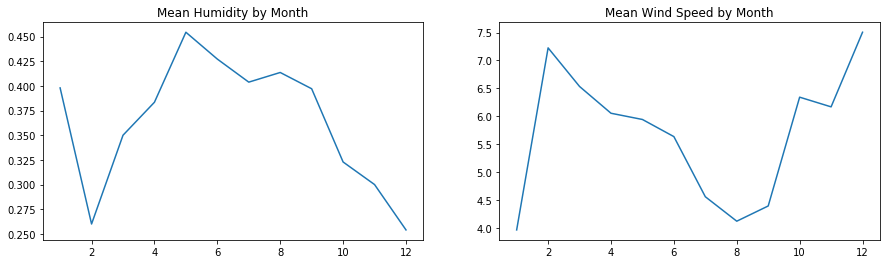

In [194]:
plt.figure(figsize = [15, 4])

# mean temperature high by month (Farenheit)
plt.subplot(1, 2, 1)
plt.title('Mean Humidity by Month')
plt.plot(df.groupby(fire_month)['humidity'].mean())

# mean wind speed of wildfires by month
plt.subplot(1, 2, 2)
plt.title('Mean Wind Speed by Month')
plt.plot(df.groupby(fire_month)['windSpeed'].mean())

### Findings
* The windier months are when there are fewer fires; however, it could indicate why there are some large fires in those colder months.
* It's a bit surprising to find the humidity levels lower in February and March than in the summer months...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1311f19d0>,
      dtype=object)

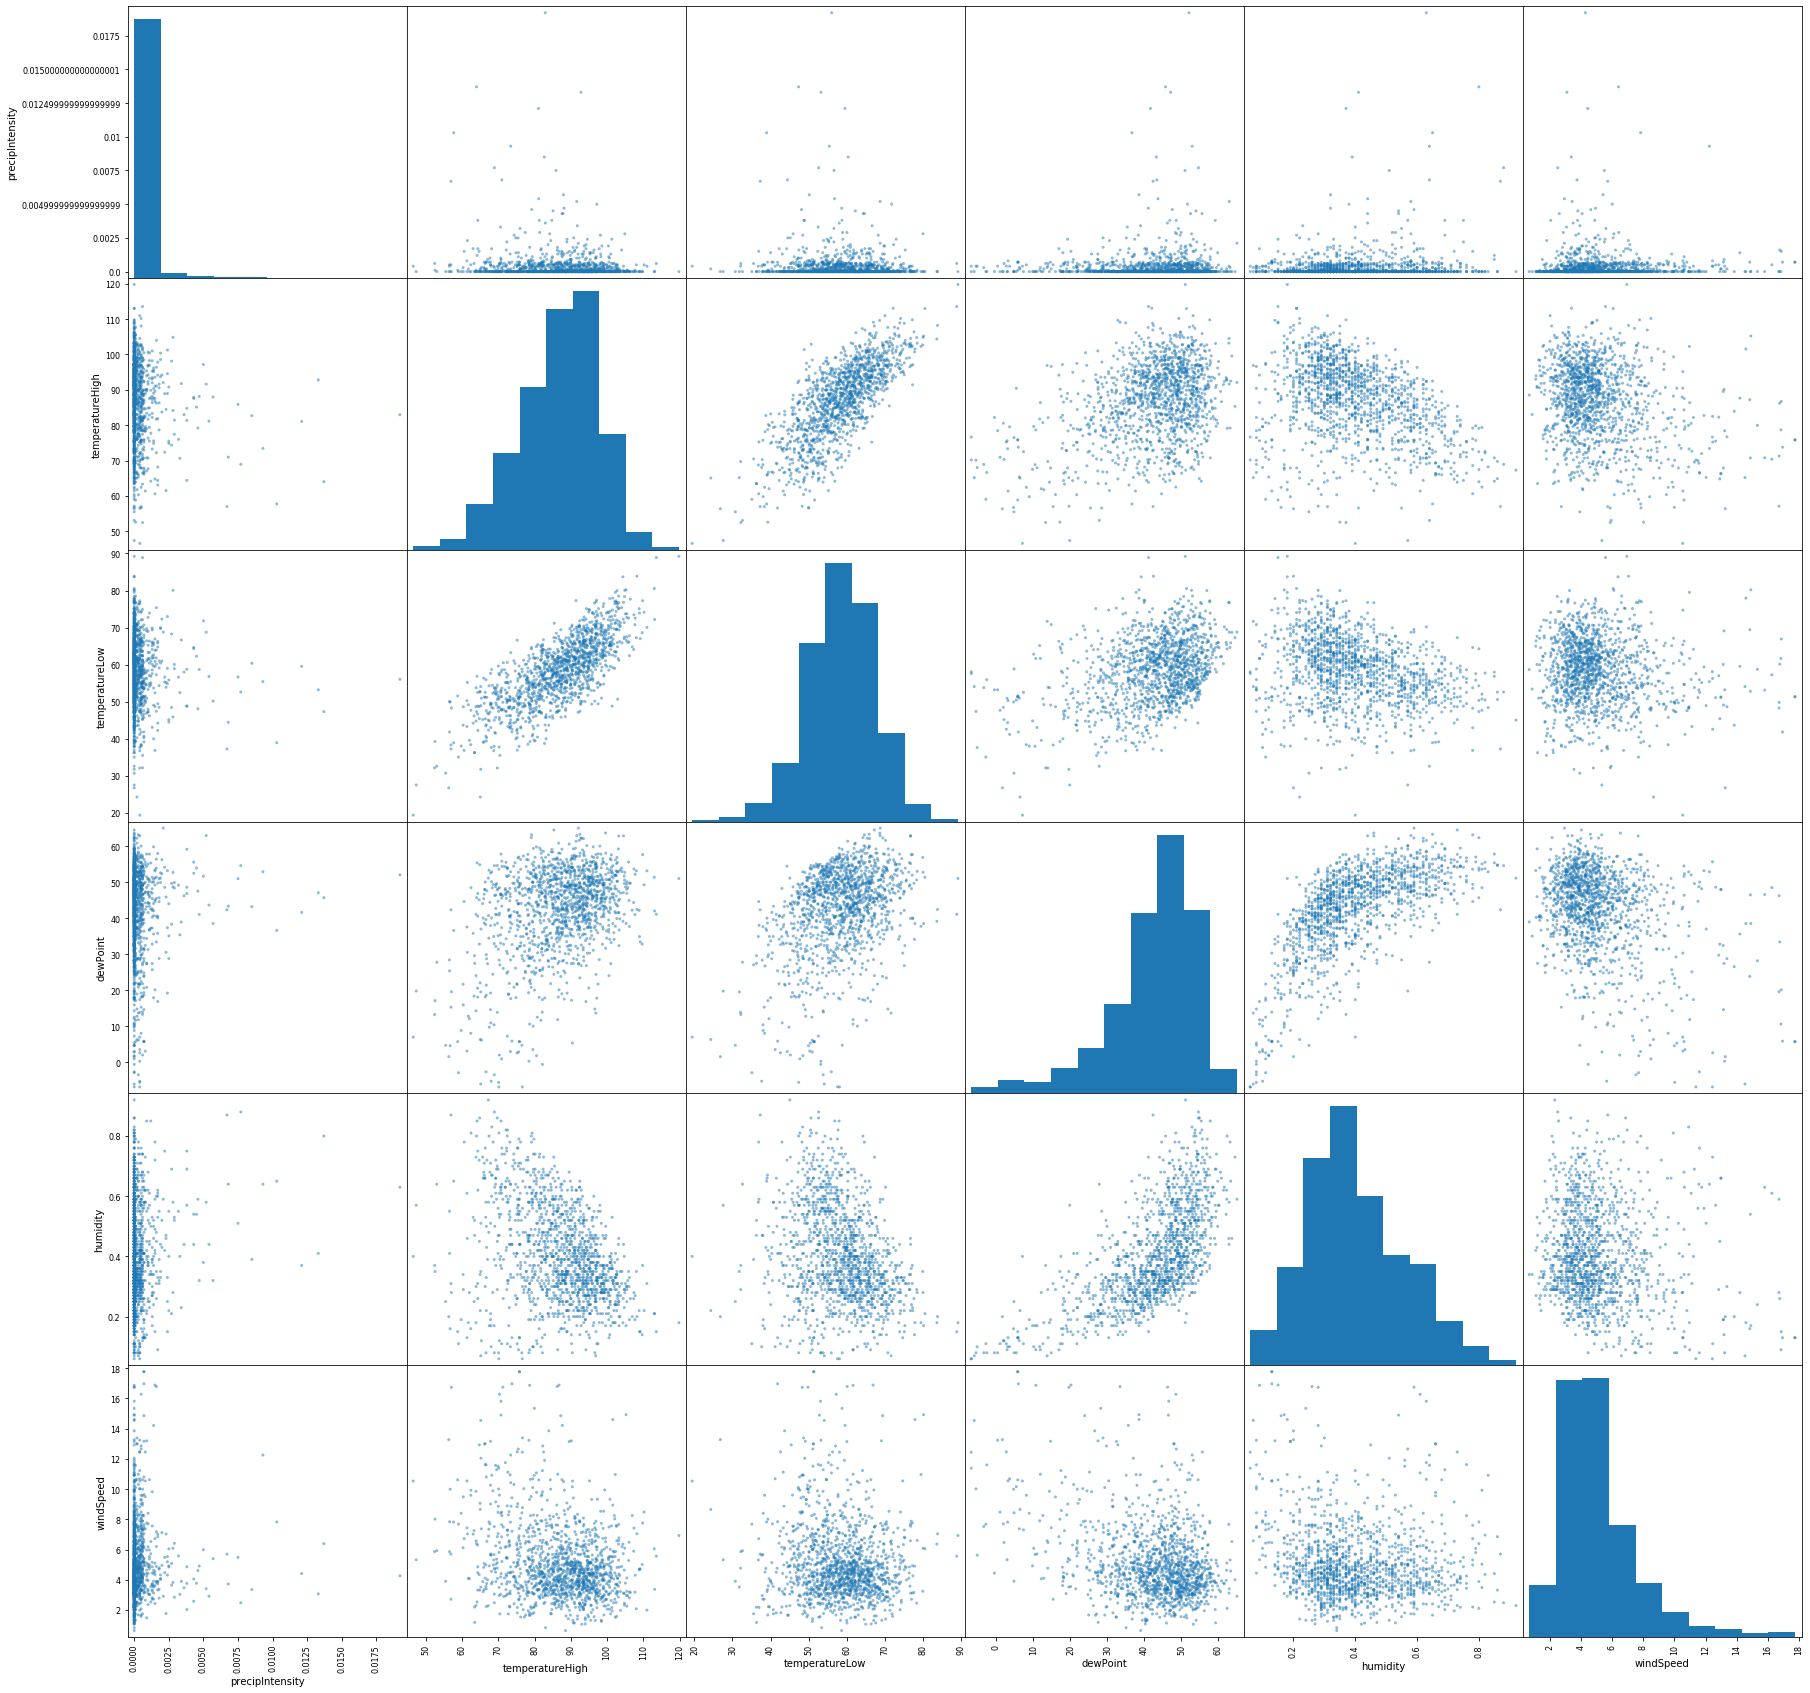

In [202]:
pd.plotting.scatter_matrix(df.iloc[:, -6:], figsize=(30, 30))

## Target Variable: Acres burned

In [ ]:
# take the log of acres burned and plot it
np.log(fire_df['AcresBurned']).plot(kind='hist', figsize=(3, 2))

In [ ]:
# create new column for acres burned (log)
fire_df['AcresBurnedLog'] = np.log(fire_df.loc[:, 'AcresBurned'])